In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
import sys
pd.options.mode.chained_assignment = None

### Remembering Research question

>Is there a trend over time to consume more local products?

>    - Are new products mostly using primary resources from Switzerland? Or from other countries inside Europe?
>    - Are new products mostly manufactured in Switzerland? Or from other countries inside Europe?
>    - Is there a trend over time to local products to promote their origin?

### Reading data

In [3]:
DATA_FOLDER = './data/'

In [4]:
openfood_file = "en.openfoodfacts.org.products.csv"
openfood = pd.read_csv(DATA_FOLDER + openfood_file, sep = '\t', low_memory=False)

In [29]:
consSwit_file = "je-f-07.06.02.xlsx"
header_row = 3
consSwit = pd.read_excel(DATA_FOLDER + consSwit_file, header=header_row)
#Remove first rows (with contextual information)
consSwit.drop(consSwit.index[0:2], inplace=True)
#Remove last rows (with duplicate information and contextual information)
consSwit.drop(consSwit.index[23:32], inplace=True)
#Change name of column
consSwit = consSwit.rename(columns={'Unnamed: 0':'products'})
#Set <products> as column
consSwit = consSwit.set_index('products')
#Drop last column, as has partial information of the year
consSwit = consSwit.drop(columns=['2016 p'])

In [6]:
invAgr_file = "je-f-07.02.03.02.04.xlsx"
header_row = 2
invAgr = pd.read_excel(DATA_FOLDER + invAgr_file, header=header_row)
#Remove first rows (with contextual information)
invAgr.drop(invAgr.index[0:7], inplace=True)
#Remove last rows (with duplicate information and contextual information)
invAgr.drop(invAgr.index[16:43], inplace=True)
#Change name of column
invAgr = invAgr.rename(columns={'Unnamed: 0':'typeInv'})
invAgr = invAgr.set_index('typeInv')

### Exploration of datasets

##### Consumption Switzerland

> Super Categories

In [30]:
catConsSwit = consSwit.loc[(consSwit.index== 'Céréales')]
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Pommes de terre')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Sucre')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Miel')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Légumes 1')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Fruits 1')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Huiles et graisses végétales')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Lait et produits laitiers')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Oeufs')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Poissons et mollusques')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Vin')])
catConsSwit

,Etat des produits,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,,
Céréales,Grain,98.013754,93.737296,96.762305,93.884316,99.974945,91.893762,90.099344,89.972571,92.587820
Pommes de terre,"Fraîches, non parées",41.778600,46.869346,46.268682,47.817157,44.481201,48.713089,51.708254,41.844096,50.635046
Sucre,Sucre raffiné,43.167207,43.590842,40.974560,37.465394,37.445127,36.370639,40.214113,37.856708,38.065779
Miel,Miel,1.348237,1.210427,1.288076,1.321601,1.432108,1.158042,1.392348,1.136757,1.435543
Légumes 1,"Frais, non parés",103.237925,105.738089,108.198836,107.227660,108.150723,106.543807,105.200511,104.577329,104.155867
Fruits 1,"Frais, non parés",118.882028,123.689979,124.171271,119.810187,117.028790,121.106067,119.261679,114.949381,115.087259
Huiles et graisses végétales,Huile,16.167350,16.141488,17.108515,17.395802,17.695043,16.176501,17.683895,17.861493,16.843297
Lait et produits laitiers,Equivalent en lait entier,255.683841,252.642256,245.855948,248.891431,252.199542,247.679618,251.584253,248.167039,246.696216
Oeufs,Oeufs en coquille,11.674521,11.814421,11.937904,12.130130,11.517631,11.500115,11.625213,11.759390,11.750973


> subCategories

In [31]:
subConsSwit = consSwit.loc[(consSwit.index== 'Céréales')]
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Pommes de terre')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Sucre')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Miel')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Légumes 1')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'jus de légumes et de fruits')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Huiles et graisses végétales')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de boeuf')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de veau')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de porc')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de mouton')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de chèvre et de cheval')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Volaille')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Lait de consommation')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Yogourt')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Fromage y compris séré')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Beurre')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Oeufs')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Vin')])
subConsSwit

,Etat des produits,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,,
Céréales,Grain,98.013754,93.737296,96.762305,93.884316,99.974945,91.893762,90.099344,89.972571,92.587820
Pommes de terre,"Fraîches, non parées",41.778600,46.869346,46.268682,47.817157,44.481201,48.713089,51.708254,41.844096,50.635046
Sucre,Sucre raffiné,43.167207,43.590842,40.974560,37.465394,37.445127,36.370639,40.214113,37.856708,38.065779
Miel,Miel,1.348237,1.210427,1.288076,1.321601,1.432108,1.158042,1.392348,1.136757,1.435543
Légumes 1,"Frais, non parés",103.237925,105.738089,108.198836,107.227660,108.150723,106.543807,105.200511,104.577329,104.155867
jus de légumes et de fruits,Jus,29.253410,32.029329,29.792858,26.973705,25.599959,28.426779,27.256378,23.147393,22.569690
Huiles et graisses végétales,Huile,16.167350,16.141488,17.108515,17.395802,17.695043,16.176501,17.683895,17.861493,16.843297
de boeuf,Viande désossée,11.104512,11.678009,10.972415,11.116410,11.078811,10.827222,11.337183,11.140308,10.954513
de veau,Viande désossée,2.831675,2.715483,2.825663,2.784833,2.799275,2.735075,2.635967,2.540798,2.422341


##### Agriculture investment

> Super categories

In [45]:
catInvAgr = invAgr.loc[(invAgr.index== 'Administration, exécution et contrôle')]
catInvAgr = catInvAgr.append(invAgr.loc[(invAgr.index== 'Amélioration des bases de production')])
catInvAgr = catInvAgr.append(invAgr.loc[(invAgr.index== 'Production et ventes')])
catInvAgr = catInvAgr.append(invAgr.loc[(invAgr.index== 'Paiements directs et mesures sociales')])
catInvAgr

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
typeInv,,,,,,,,,,,,,,,,,,,,,
"Administration, exécution et contrôle",25.5316,27.9445,34.5693,34.9648,34.5059,33.7511,33.9551,35.3384,37.5954,40.9842,...,103.99,110.646,115.068,118.362,122.594,121.58,122.639,121.9,119.066,115.32
Amélioration des bases de production,228.481,258.363,214.028,225.648,213.423,164.163,156.527,152.18,163.718,157.664,...,200.212,177.771,178.787,143.227,189.71,187.406,181.907,157.544,144.163,135.075
Production et ventes,1484.78,1542.46,1537.93,1476.32,1296.38,1336.69,1336.58,1161.16,1059.1,1445.6,...,611.164,564.031,504.762,517.126,504.27,520.089,500.739,526.136,530.371,531.526
Paiements directs et mesures sociales,774.487,1073.75,1180.01,1486.5,1759.85,1821.01,2237.48,2379.81,2482.57,2383.88,...,2635.51,2839.83,2867.09,2884.3,2894.54,2876.9,2887.22,2861.69,2864.42,2870.05


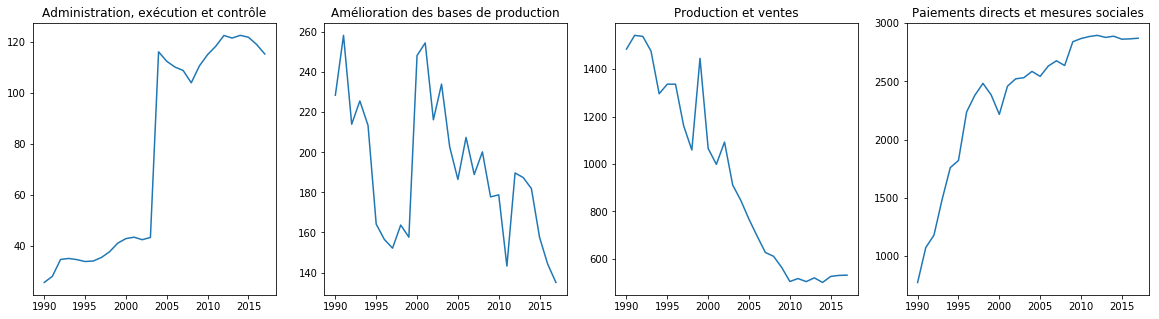

In [46]:
# 3 figures in same output
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
_ = catInvAgr.iloc[0].plot(ax=axes[0], kind='line', title="Administration, exécution et contrôle")
_ = catInvAgr.iloc[1].plot(ax=axes[1], kind='line', title="Amélioration des bases de production")
_ = catInvAgr.iloc[2].plot(ax=axes[2], kind='line', title="Production et ventes")
_ = catInvAgr.iloc[3].plot(ax=axes[3], kind='line', title="Paiements directs et mesures sociales")

> Subcategories

In [166]:
##Lets analyze sub categories
subCatInvAgr = invAgr.drop(invAgr.index[[0,4,8,14]])
subCatInvAgr

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Administration,25.5316,27.9445,34.5693,34.9648,34.5059,33.7511,33.9551,35.3384,37.5954,40.9842,...,47.7666,51.8475,55.2193,55.1342,54.5769,54.2367,55.8413,54.6635,53.7946,51.8627
Vulgarisation,0,0,0,0,0,0,0,0,0,0,...,11.3264,11.15,12.1774,12.0389,12,11.9972,11.9907,11.8702,11.5978,11.6199
Exécution et contrôle,0,0,0,0,0,0,0,0,0,0,...,44.8971,47.6487,47.6711,51.1889,56.017,55.3459,54.8072,55.3661,53.6737,51.8376
Améliorations structurelles,156.629,181.957,132.111,146.864,137.128,92.8777,91.0377,88.0971,95.9802,95.8635,...,139.501,129.792,132,95.9998,141,138.808,134.225,109.943,96.6955,86.3919
Améliorations de l'élevage,39.6888,41.864,46.002,45.1904,44.1103,42.3632,40.5382,38.8595,39.6513,34.2381,...,49.6232,45.8841,45.1557,45.7281,46.8031,46.4854,45.627,46.2907,46.9538,46.5638
Protection des plantes,32.1631,34.5424,35.9143,33.5941,32.1853,28.922,24.9516,25.2233,28.086,27.5623,...,11.088,2.09423,1.63093,1.49867,1.90723,2.11288,2.05525,1.31005,0.514118,2.11973
Promotion des ventes,114.274,125.817,101.523,96.2237,72.4062,53.159,118.812,54.3641,6.11985,49.5465,...,0,0,0,0,0,0,0,0,0,0
Economie laitière,954.492,1048.93,1104.35,1091.71,959.697,1042.77,943.557,793.305,713.598,1052.23,...,349.663,298.212,291.944,295.311,300.738,301.329,295.53,295.436,296.414,296.273
Production animale,0,0,0,0,0,0,0,0,13.6229,32.585,...,18.2183,17.7981,10.1908,12.4234,11.49,11.8461,11.8762,11.9674,12.5758,12.2882


##### OpenFoodSwitzerland

The first decision is to narrow down the search, just for Switzerland products

In [13]:
foodSwitzerland = openfood[openfood['countries_tags']=="en:switzerland"]

In [14]:
nbProdSwit = len(foodSwitzerland)
print("Number of products: ", nbProdSwit)
foodSwitzerland.head()

Number of products:  13454


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
285,0000003301098,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1527593074,2018-05-29T11:24:34Z,1527593109,2018-05-29T11:25:09Z,Mini cuchaule au beurre,NaN,100 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,0000013000004,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1484431999,2017-01-14T22:13:19Z,1484432028,2017-01-14T22:13:48Z,Kochspeck,NaN,686 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,00025393,http://world-en.openfoodfacts.org/product/0002...,openfoodfacts-contributors,1530019114,2018-06-26T13:18:34Z,1530019311,2018-06-26T13:21:51Z,Salade de lentilles,NaN,200 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,0007200000021,http://world-en.openfoodfacts.org/product/0007...,date-limite-app,1418991821,2014-12-19T12:23:41Z,1442754589,2015-09-20T13:09:49Z,Sauce bolognaise,NaN,420 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,0010000002218,http://world-en.openfoodfacts.org/product/0010...,date-limite-app,1442659864,2015-09-19T10:51:04Z,1461430836,2016-04-23T17:00:36Z,Ikea Lachs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
list(foodSwitzerland)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_

In [32]:
list(foodSwitzerland['image_url'])

[nan,
 nan,
 nan,
 'https://static.openfoodfacts.org/images/products/000/720/000/0021/front_en.3.400.jpg',
 'https://static.openfoodfacts.org/images/products/001/000/000/2218/front.3.400.jpg',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://static.openfoodfacts.org/images/products/002/400/001/4430/front.3.400.jpg',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://static.openfoodfacts.org/images/products/003/089/105/1171/front.3.400.jpg',
 nan,
 nan,
 nan,
 'https://static.openfoodfacts.org/images/products/003/398/403/2750/front_en.3.400.jpg',
 'https://static.openfoodfacts.org/images/products/003/720/000/0011/front.3.400.jpg',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://static.openfoodfacts.org/images/products/004/600/028/3289/front.14.400.jpg',
 nan,
 'https://static.openfoodfacts.org/images/products/005/100/000/2006/front.3.400.jpg',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

## 2. A first perspective: Compare old vs new products inside the dataset

A product in the dataset is considered "old" if its description was uploaded to the dataset before February 2017. By the contrary, it is considered as "new" if its description was uploaded after that date.

_As that definition is a little rigid, in order to get closer to the real situation, the following assumption is made: From the total products uploaded to the dataset after February 2017, 20% are old products._  

A first perspective to tackle the research question, is to compare how in this more than 6 years of existance of the dataset, the characteristics of the products have changed. Specifically, we would like to know if there have been some changes in the origin of the primary resources, or in the origin of the manufacture or in the labels of the products.

The study of the evolution in time of each one of those features, will include an __exploratory data analysis__.
Finally, a study including the three features will be done, aiming to find an aggregated differentiated behavior in time, reflected in different clusters of periods of time. For that the __K-modes algorithm__ will be used.

In [7]:
print("Date of first upload: ", min(foodSwitzerland['created_datetime']))
print("Date of last upload retrieved: ", max(foodSwitzerland['created_datetime']))

Date of first upload:  2012-05-16T18:33:35Z
Date of last upload retrieved:  2018-11-23T08:40:49Z


In [8]:
foodSwitzerland['created_datetime'] = pd.to_datetime(foodSwitzerland['created_datetime'])
foodSwitzerland = foodSwitzerland.sort_values(by='created_datetime')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The uploads of products sold in Switzerland, behaves differently in time. Taking into account the histogram presented below, two periods of time are defined:
- Period 1: Created for studying the behaviour from "old" products. Products uploaded before Feb 2017.
- Period 2: Created for studying the behaviour from "new" products. Products uploaded after Feb 2017.

Old products:  11826.8
New products:  1627.2


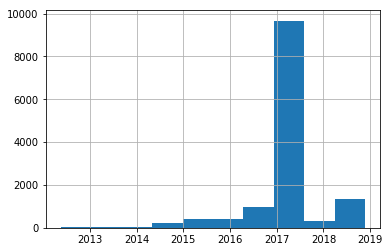

In [9]:
rateOldInNew = 0.2
old_products = len(foodSwitzerland[foodSwitzerland['created_datetime']<"2017-03-01 00:00:00"])
print("Old products: ", old_products + (len(foodSwitzerland)-old_products)*(rateOldInNew))
print("New products: ", (len(foodSwitzerland)-old_products)*(1-rateOldInNew))
foodSwitzerland['created_datetime'].hist()

Before making subdivision of data:

In [10]:
filter_ch = '[Ss]witzerland|[Ss]uisse|[Ss]chweiz|[Ss]vizerra'
filter_local = '[Ss]witzerland|[Ss]uisse|[Ss]chweiz|[Ss]vizerra|[Ll]ocal'

place = pd.Series(['Other country','Switzerland', 'No information'], index=[0,1,2])
refLabel = pd.Series(['Other Label','Related with Switzerland', 'No information'], index=[0,1,2]) 

foodSwitzerland["originsCat"] = foodSwitzerland["origins"].str.contains(filter_ch,regex=True).map(place,na_action='ignore')
foodSwitzerland["manuCat"] = foodSwitzerland["manufacturing_places"].str.contains(filter_ch,regex=True).map(place,na_action='ignore')
foodSwitzerland["labCat"] = foodSwitzerland["labels_tags"].str.contains(filter_local,regex=True).map(refLabel,na_action='ignore')

Now, let's do the subdivision in the two periods, taking care of our assumption of 20%:

In [11]:
foodSwitzerlandBef = foodSwitzerland[foodSwitzerland['created_datetime']<"2017-03-01 00:00:00"]
foodSwitzerlandAft = foodSwitzerland[foodSwitzerland['created_datetime']>="2017-03-01 00:00:00"]

befInAft = foodSwitzerlandAft.sample(n=int(rateOldInNew*len(foodSwitzerlandAft)), replace=False)
foodSwitzerlandBef = pd.concat([foodSwitzerlandBef,befInAft],axis=0)

for i in range (0,len(befInAft)):
    foodSwitzerlandAft = foodSwitzerlandAft[foodSwitzerlandAft['code']!=befInAft['code'].iloc[i]]
print("Number of Old products: ", np.shape(foodSwitzerlandBef))
print("Number of New products: ", np.shape(foodSwitzerlandAft))

Number of Old products:  (11826, 176)
Number of New products:  (1627, 176)


### 2.1. Study of the evolution in time of each one of the interest features

### 2.1.1 With respect to: Origin of the primary resources

First, bootstrapping for include confidence intervals to results

In [27]:
#before
propSB_100ite = np.zeros (100)
propOCB_100ite = np.zeros (100)
#after
propSA_100ite = np.zeros (100)
propOCA_100ite = np.zeros (100)

for iteration in range(0,100):
    #before
    temp_bef = foodSwitzerlandBef["originsCat"].sample(n=len(foodSwitzerlandBef), replace=True)
    propSB_100ite[iteration] = (sum(temp_bef=="Switzerland")/len(foodSwitzerlandBef))
    propOCB_100ite[iteration] = sum(temp_bef=="Other country")/len(foodSwitzerlandBef)
    #after
    temp_aft = foodSwitzerlandAft["originsCat"].sample(n=len(foodSwitzerlandAft), replace=True)
    propSA_100ite[iteration] = sum(temp_aft=="Switzerland")/len(foodSwitzerlandAft)
    propOCA_100ite[iteration] = sum(temp_aft=="Other country")/len(foodSwitzerlandAft)
    
    #Relation of time evolution and difference of products in each categories
    difpropB = propSB_100ite[iteration]-propOCB_100ite[iteration]
    difpropA = propSB_100ite[iteration]-propOCA_100ite[iteration]

#Calculating standard deviation of count of each category
SBstd = np.std(propSB_100ite)
OCBstd = np.std(propOCB_100ite)
#Calculating standard deviation of count of each category
SAstd = propSA_100ite.std()
OCAstd = propOCA_100ite.std()

Then, plotting of behavior 

There was not information for  11167  products in the period 1.
There was not information for  1544  products in the period 2.


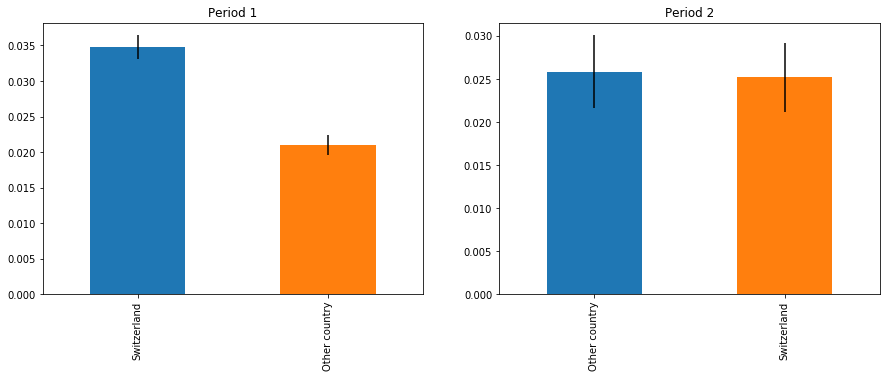

In [28]:
#Report information of NAN cases
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
print("There was not information for ",len(foodSwitzerlandBef["originsCat"])-sum(foodSwitzerlandBef["originsCat"]=="Switzerland")-sum(foodSwitzerlandBef["originsCat"]=="Other country")," products in the period 1.")
print("There was not information for ",len(foodSwitzerlandAft["originsCat"])-sum(foodSwitzerlandAft["originsCat"]=="Switzerland")-sum(foodSwitzerlandAft["originsCat"]=="Other country")," products in the period 2.")

#Plot origin of primary resources by periods
plt.subplot(1,2,1)
(foodSwitzerlandBef["originsCat"].value_counts()/len(foodSwitzerlandBef["originsCat"])).plot(kind='bar', yerr = [SBstd,OCBstd],title='Period 1')
plt.subplot(1,2,2)
(foodSwitzerlandAft["originsCat"].value_counts()/len(foodSwitzerlandAft["originsCat"])).plot(kind='bar', yerr = [SAstd,OCAstd],title='Period 2')

plt.show()

### 2.1.2 With respect to: Manufacture

First, bootstrapping for include confidence intervals to results

In [29]:
#before
propSB_100ite = np.zeros (100)
propOCB_100ite = np.zeros (100)

#after
propSA_100ite = np.zeros (100)
propOCA_100ite = np.zeros (100)

for iteration in range(0,100):
    #before
    temp_bef = foodSwitzerlandBef["manuCat"].sample(n=len(foodSwitzerlandBef), replace=True)
    propSB_100ite[iteration] = sum(temp_bef=="Switzerland")/len(foodSwitzerlandBef)
    propOCB_100ite[iteration] = sum(temp_bef=="Other country")/len(foodSwitzerlandBef)
    #after
    temp_aft = foodSwitzerlandAft["manuCat"].sample(n=len(foodSwitzerlandAft), replace=True)
    propSA_100ite[iteration] = sum(temp_aft=="Switzerland")/len(foodSwitzerlandAft)
    propOCA_100ite[iteration] = sum(temp_aft=="Other country")/len(foodSwitzerlandAft)
    

#Calculating standard deviation of count of each category
SBstd = propSB_100ite.std()
OCBstd = propOCB_100ite.std()
#Calculating standard deviation of count of each category
SAstd = propSA_100ite.std()
OCAstd = propOCA_100ite.std()

There was not information for  10871  products in the period 1.
There was not information for  1487  products in the period 2.


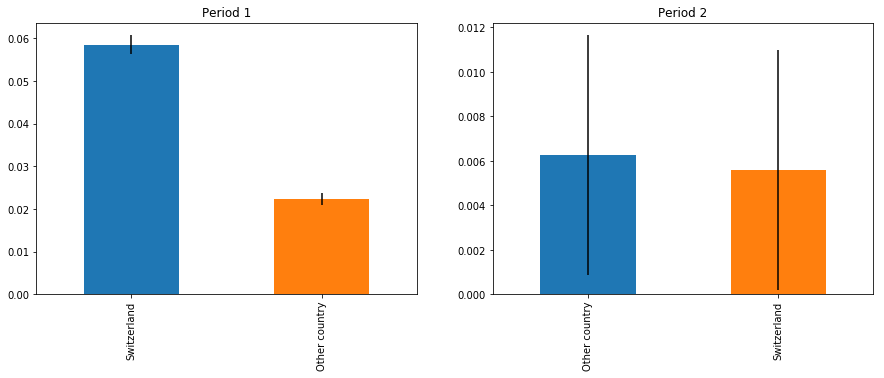

In [30]:
#Report information of NAN cases
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
print("There was not information for ",len(foodSwitzerlandBef["manuCat"])-sum(foodSwitzerlandBef["manuCat"]=="Switzerland")-sum(foodSwitzerlandBef["manuCat"]=="Other country")," products in the period 1.")
print("There was not information for ",len(foodSwitzerlandAft["manuCat"])-sum(foodSwitzerlandAft["manuCat"]=="Switzerland")-sum(foodSwitzerlandAft["manuCat"]=="Other country")," products in the period 2.")

#Plot origin of primary resources by periods
plt.subplot(1,2,1)
(foodSwitzerlandBef["manuCat"].value_counts()/len(foodSwitzerlandBef["manuCat"])).plot(kind='bar', yerr = [SBstd,OCBstd],title='Period 1')
plt.subplot(1,2,2)
(foodSwitzerlandAft["manuCat"].value_counts()/len(foodSwitzerlandBef["manuCat"])).plot(kind='bar', yerr = [SAstd,OCAstd],title='Period 2')

plt.show()

### 2.1.3 With respect to: Labels

In [31]:
#before
propSB_100ite = np.zeros (100)
propOCB_100ite = np.zeros (100)
#after
propSA_100ite = np.zeros (100)
propOCA_100ite = np.zeros (100)

for iteration in range(0,100):
    #before
    temp_bef = foodSwitzerlandBef["labCat"].sample(n=len(foodSwitzerlandBef), replace=True)
    propSB_100ite[iteration] = sum(temp_bef=="Related with Switzerland")/len(foodSwitzerlandBef)
    propOCB_100ite[iteration] = sum(temp_bef=="Other Label")/len(foodSwitzerlandBef)
    #after
    temp_aft = foodSwitzerlandAft["labCat"].sample(n=len(foodSwitzerlandAft), replace=True)
    propSA_100ite[iteration] = sum(temp_aft=="Related with Switzerland")/len(foodSwitzerlandAft)
    propOCA_100ite[iteration] = sum(temp_aft=="Other Label")/len(foodSwitzerlandAft)
    
    #Relation of time evolution and difference of products in each categories
    difpropB = propSB_100ite[iteration]-propOCB_100ite[iteration]
    difpropA = propSB_100ite[iteration]-propOCA_100ite[iteration]

#Calculating standard deviation of count of each category
SBstd = propSB_100ite.std()
OCBstd = propOCB_100ite.std()
#Calculating standard deviation of count of each category
SAstd = propSA_100ite.std()
OCAstd = propOCA_100ite.std()

There was not information for  11826  products in the period 1.
There was not information for  1627  products in the period 2.


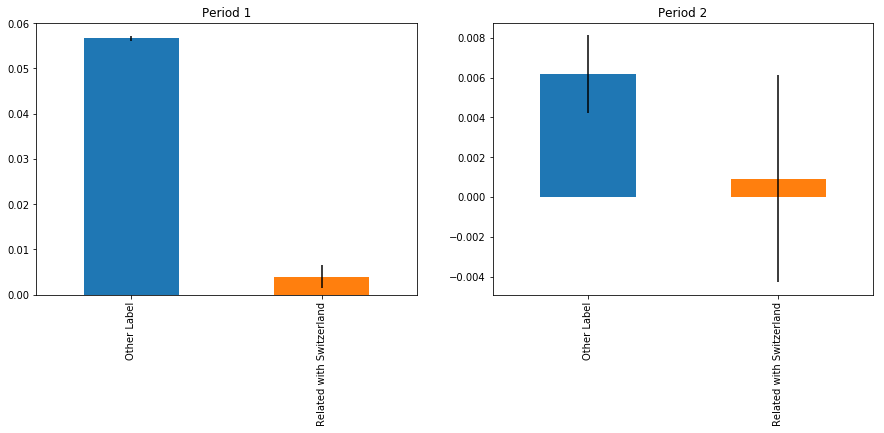

In [32]:
#Report information of NAN cases
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
print("There was not information for ",len(foodSwitzerlandBef["labCat"])-sum(foodSwitzerlandBef["labCat"]=="Switzerland")-sum(foodSwitzerlandBef["labCat"]=="Other country")," products in the period 1.")
print("There was not information for ",len(foodSwitzerlandAft["labCat"])-sum(foodSwitzerlandAft["labCat"]=="Switzerland")-sum(foodSwitzerlandAft["labCat"]=="Other country")," products in the period 2.")

#Plot origin of primary resources by periods
plt.subplot(1,2,1)
(foodSwitzerlandBef["labCat"].value_counts()/len(foodSwitzerlandBef["labCat"])).plot(kind='bar', yerr = [SBstd,OCBstd],title='Period 1')
plt.subplot(1,2,2)
(foodSwitzerlandAft["labCat"].value_counts()/len(foodSwitzerlandBef["labCat"])).plot(kind='bar', yerr = [SAstd,OCAstd],title='Period 2')

plt.show()

### 2.2 Study of the evolution in time of the interest features combined

The k-modes algorithm is expected to be done for the milestone 3.